# DeMystifying Machine Learning

# This Notebook

This notebook consists of 4 parts:


## Part 1 - NumPY DNN

This part will walk through with an example constructing a DNN(MLP) using numpy from scratch.

This will demonstrate how the forward and back propagation work for a simple training of a controlled dataset.

## Part 2 - PyTorch DNN

This part will demonstrate repeating the process of building an MLP using the PyTorch API to repeat the same work.

Hopefully this demonstrates the advantage of working with frameworks which do the heavy lifting of generating the back-propagation for us from scratch

## Part 3 - PyTorch Classifier

This part will demonstrate constructing a Classifier model to classify data from the mnist numerical dataset.

We will also use an independent data sub-set to estimate the model accuracy after training.

## Part 4 - Projecting beyond the Training Window (Bonus)

This part of the notebook is a bonus part if you've been able to finish all of the work above.

This is set out to answer the question. What happens when we project beyond our training window with our Sinusoid model

## Marking

You will get marks for completing the different tasks within this notebook:

Any code expected for you to complete will contain `## FINISH_ME ##` indicating the code isn't expected to run until you have completed it.

I would recommend tackling the playbook in order from Part1 -> Part2 -> Part3 -> Part4.

Parts 5-9 are due for hand-in on your GitHubs (instructions to follow) by 9:30am on Friday, 30 January, together with a few problems from Week 2.


| <p align='left'> Title                         | <p align='left'> Parts | <p align='left'> Number of marks | <p align='left'> Marks awarded |
| ------------------------------------- | ----- | --- | --- |
| <p align='left'> 1. Completing the NumPY DNN model      | <p align='left'>  2  | <p align='left'>  (Workshop) | <p align='left'> -- |
| <p align='left'> 2. Training the NumPY DNN model & verifying by prediction | <p align='left'>  2  | <p align='left'>  (Workshop) | <p align='left'> -- |
| <p align='left'> 3. Construct a PyTorch DNN model       | <p align='left'>  1  | <p align='left'>  (Workshop) | <p align='left'> -- |
| <p align='left'> 4. Train the PyTorch DNN model & verify using evaluate    | <p align='left'>  2  | <p align='left'>  (Workshop) | <p align='left'> -- |
| <p align='left'> 5. Examine the MNist dataset           | <p align='left'>  1  | <p align='left'> 1 (HW) | <p align='left'> |
| <p align='left'> 6. Evaluate pre-trained model accuracy | <p align='left'>  1  | <p align='left'> 1 (HW) | <p align='left'> |
| <p align='left'> 7. Build PyTorch Classifier            | <p align='left'>  1  | <p align='left'> 1 (HW) | <p align='left'> |
| <p align='left'> 8. Train the PyTorch Classifier        | <p align='left'>  1  | <p align='left'> 1 (HW) | <p align='left'> |
| <p align='left'> 9. Estimate the PyTorch model Classifier Accuracy | <p align='left'>  1  | <p align='left'> 1 (HW) | <p align='left'> |
| <p align='left'> **Bonus 1:** Projecting both DNN models beyond the training window | <p align='left'>   | <p align='left'> (not marked) | <p align='left'> -- |
| <p align='left'> **Total** | | <p align='left'> max **5** | <p align='left'> |

***
***
# Part 1 - NumPy DNN
This part of the notebook walks you through building a DNN from scratch using nothing but numpy
***
***

***
## Part 1 - Imports and Globals

First we're going to import the numpy modules and pyplot modules to allow us to manipulate and plot data

In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
# Reproducibility in Science is critical, in computing it's often just a convenience
_FIXED_SEED=12345
np.random.seed(_FIXED_SEED)

In [190]:
# We haven't made any attempt to optimize our simple model so let's give it plenty of 'time' to train
epochs = 100000
# We know that the model can potentially be unstable, so let's take small steps toward the 'minima'
learning_rate = 0.0001

***
## Part 1 - Build our model using numPy

You will need to complete this module which builds a short DNN, or MLP which consists of fully interconnected nodes.

Nodes are connected by the information being passed from one layer to the other so multiplying all of the nodes in the output from later 1 in layer 2 is 'connecting' them.

You will have to complete the constructor for this class as well as layer 2 within this model for the forward and backward propagation.

In [191]:
# Define the SimpleDNN_NP architecture
class SimpleDNN_NP:
    def __init__(self, hidden_size):
        # We need to have a constructor here as our model has some parameters which need to be initialized & stored

        # This example only works for input and output elements of dimension 1
        # Formally you can extend this to work with batches with elements larger than 1
        # But that is not the focus of this example
        input_size = 1
        output_size = 1

        # We want to build a simple 3 layer network
        # The first layer has input_size nodes, the second hidden_size nodes, and the third output_size nodes
        # Weights need to be constructed to connect the nodes in each layer
        # Weights should be initialized randomly, biases are initialized to zero

        # Initialize weights and biases using Xavier/Glorot Initialization
        # This keeps the scale of gradients roughly the same in all layers
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)  # Weights Layer 1
        self.b1 = np.zeros(hidden_size)  # Biases Layer 1
        self.W2 = np.random.randn(hidden_size,hidden_size) * np.sqrt(1. / hidden_size)
        self.b2 = np.zeros(hidden_size)## FINISH_ME ## # Biases Layer 2
        self.W3 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)## FINISH_ME ## # Weights Layer 3
        self.b3 = np.zeros(output_size)## FINISH_ME ## # Biases Layer 3

        # These are used for tracking the model states during the Forward Pass
        self.z1 = self.z2 = self.z3 = None  # pre-activation values
        self.a1 = self.a2 = self.a3 = None  # activation values

        # These are used for tracking the model states during the Backward Pass
        self.gradient_W3 = self.gradient_W2 = self.gradient_W1 = None  # gradients of weights
        self.gradient_b3 = self.gradient_b2 = self.gradient_b1 = None  # gradients of biases

        # Momentum terms
        # vW? and vb? track a "velocity" for each parameter, same shape as W? and b?
        self.vW1 = self.vW2 = self.vW3 = 0
        self.vb1 = self.vb2 = self.vb3 = 0

    def forward(self, x):
        # This method will be the 'evaluation' of the model

        # Forward pass through the network

        # We expect to have our data batched into dimension: ( ?, 1)
        # This means that we multiply each element within the input so:
        #     (?, 1) * (1, hidden_dim) = (?, hidden_dim) + b
        # From this we then get:
        #     Activation((?, hidden_dim)+b) * ((hidden_dim, hidden_dim)+b2) = (?, hidden_dim)
        # Finally:
        #     Activation((?, hidden_dim)+b2) * (hidden_dim, 1) = (?, 1)

        # From our lecture we know that the forward pass is just a series of matrix multiplications and activations
        # In order to perform back-propagation we need to store the intermediate values of the forward pass
        # This means we need to store the pre-activation (z) and activation (a) values of each layer

        # Pass the input data x through the first layer of the network
        # Apply Weights and biases, Layer1
        self.z1 = np.matmul(x, self.W1) + self.b1  # pre-activation of layer1
        self.a1 = np.tanh(self.z1)  # activation function gives activated layer1 output

        # Pass the output from later 1 through the second layer of the network
        # Apply Weights and biases, Layer2
        self.z2 = np.matmul(self.a1, self.W2) + self.b2## FINISH_ME ## # pre-activation of layer2
        self.a2 = np.tanh(self.z2)## FINISH_ME ## # activation function gives activated layer2 output

        # Pass the output from layer 2 through the third layer of the network
        # Apply Weights and biases, Layer3
        self.z3 = np.matmul(self.a2, self.W3) + self.b3  # pre-activation of layer3
        # No activation function for Layer3

        # 'formally' some models need to 'project' their internal state to the output
        # For us this is done in Layer3
        y_pred = self.z3
        return y_pred

    def backward(self, x, loss_prime):
        # Backward pass (gradient descent)

        # The backward pass is the 'reverse' of the forward pass

        # Initial gradient for the whole graph is given as the derivative of the loss function
        # aka. loss_prime

        # Going from Loss back through layer3
        # Gradients for Layer3  = dy/dz3 * dL/dy = Layer2_output * Layer3_gradient = a2 * loss_prime
        self.gradient_W3 = np.matmul(self.a2.T, loss_prime)  # No activation for W3 so just calculate graph gradient here
        self.gradient_b3 = np.sum(loss_prime, axis=0)  # Calculate the bias gradient here db3 = dL/dz3 = loss_prime

        # Step from Layer3 -> layer2
        # Stepping back from Layer3 to Layer2 => Undo the effect of W3 on the gradient and the activation on Layer2 output
        gradient_a2 = np.matmul(loss_prime, self.W3.T)  # 'Undo' the effect of W3 on the gradient
        gradient_z2 = gradient_a2 * (1 - self.a2 ** 2)  # 'Undo' the effect of Activation on Layer2 output

        # Gradients for Layer2
        # Gradients for Layer2 = a1 * gradient_z2 = a1 * dL/dz3 * dz3/da2 * da2/dz2 = a1 * loss_prime * W3 * (1 - a2^2)
        self.gradient_W2 = np.matmul(self.a1.T,gradient_z2)## FINISH_ME ## # Apply Gradient at Layer2 onto Layer1 output
        self.gradient_b2 = np.sum(gradient_z2,axis=0)## FINISH_ME ## # Calculate the bias gradient here

        # Step from Layer2 -> Layer1
        # Stepping back from Layer2 to Layer1 => Undo the effect of W2 on the gradient and the activation on Layer1 output
        gradient_a1 = np.matmul(gradient_z2,self.W2.T)## FINISH_ME ##  # 'Undo' the effect of W2 on the gradient
        gradient_z1 = gradient_a1 * (1 - self.a1 ** 2)## FINISH_ME ##  # 'Un do' the effect of Activation on Layer1 output

        # Gradients for Layer1
        self.gradient_W1 = np.matmul(x.T, gradient_z1)  # Apply Gradient at Layer1 onto the input data
        self.gradient_b1 = np.sum(gradient_z1, axis=0)  # Calculate the bias gradient here

    def calculate_loss(self, y, y_pred):
        # Calculate the loss of the whole 'graph'

        diff = y_pred - y

        # Loss for whole graph is (y_pred - y)^2 / 2
        loss = diff ** 2 / 2.0

        # Initial gradient for whole graph: d/dy_pred ( (y_pred - y)^2 / 2 ) = (y_pred - y)
        loss_prime = diff

        return loss, loss_prime

    def optimize(self, learning_rate, momentum=0.9):
        # This method updates our parameters based on the gradients from backward()
        # Think of this as "taking one step" down the loss surface

        # Inputs:
        #   learning_rate : How big of a step to take (too large can diverge, too small trains slowly)
        #   momentum      : How much of the previous step direction we keep (typically ~0.9)

        # We are implementing SGD + Momentum.
        # The idea is to keep a "velocity" term (v) for each parameter.
        # This velocity accumulates consistent gradient directions and helps damp oscillations.
        #
        # Update rule used here:
        #   v = momentum * v - learning_rate * grad
        #   param = param + v
        #
        # Note: In this notebook, the gradients were computed and stored in backward():
        #   self.gradient_W1, self.gradient_b1, ... etc

        # Layer 1 updates
        # Shapes:
        #   W1: (input_size, hidden_size)
        #   b1: (hidden_size,)
        self.vW1 = momentum * self.vW1 - learning_rate * self.gradient_W1
        self.W1 += self.vW1
        self.vb1 = momentum * self.vb1 - learning_rate * self.gradient_b1
        self.b1 += self.vb1

        # Layer 2 updates
        # Shapes:
        #   W2: (hidden_size, hidden_size)
        #   b2: (hidden_size,)
        self.vW2 = momentum * self.vW2 - learning_rate * self.gradient_W2## FINISH_ME ## # use a similar pattern as Layer 1
        self.W2 += self.vW2
        self.vb2 = momentum * self.vb2 - learning_rate * self.gradient_b2## FINISH_ME ## # use a similar pattern as Layer 1
        self.b2 += self.vb2

        # Layer 3 updates
        # Shapes:
        #   W3: (hidden_size, output_size)
        #   b3: (output_size,)
        self.vW3 = momentum * self.vW3 - learning_rate * self.gradient_W3
        self.W3 += self.vW3
        self.vb3 = momentum * self.vb3 - learning_rate * self.gradient_b3
        self.b3 += self.vb3

        # For completeness, but shouldn't matter
        # Clearing these makes it easier to see if we accidentally rely on stale state across iterations
        self.a1 = self.a2 = self.a3 = None
        self.z1 = self.z2 = self.z3 = None
        self.gradient_W3 = self.gradient_W2 = self.gradient_W1 = None
        self.gradient_b3 = self.gradient_b2 = self.gradient_b1 = None

    def train(self, x, y, epochs, learning_rate, momentum=0.9):

        # History to store the evolution of the loss function vs epoch
        loss_history = []

        # Loop through x Epochs
        for epoch in range(epochs):

            ## Formally there should be some batching of data that is done here
            ## This example explicitly evaluates the whole dataset in each forward/backward pass
            ## For training on a simple sinusouid this is OK
            ## For training on 'real data' this approach will kill your performance

            # Take a forward step through our model
            y_pred = self.forward(x)

            loss, loss_prime = self.calculate_loss(y, y_pred)

            # Now take a backward step through our model
            self.backward(x, loss_prime)

            # Now update our weights based on the gradients at each point in the graph
            self.optimize(learning_rate, momentum)

            avg_loss = np.mean(loss)## FINISH_ME ##  # Calculate the average loss for this epoch

            # Some code to give output during training
            if epoch % 5000 == 0:
                print(f"epoch: {epoch}, loss: {avg_loss}")

            loss_history.append(avg_loss)

        return loss_history

***
## Part 1 - Construct our input dataset

In [192]:
# Generate sinusoidal data
timesteps = 100  # number of timesteps in the data

# It's up to you to populate x with an ndarray of 'timesteps' linearly spaced samples between 0 and 2*np.pi using the np.linspace function
x = np.linspace(0, 2 * np.pi, timesteps)
print(f"x type: {type(x)}")
print(f"x shape: {x.shape}")
# Now we want to fill y with the sin of the above parameters giving us 1 full sinusoid waveform
# If you've constructed x correctly you can just use np.sin(x)
y = np.sin(x)## FINISH_ME ##
print(f"y type: {type(y)}")
print(f"y shape: {y.shape}")

x type: <class 'numpy.ndarray'>
x shape: (100,)
y type: <class 'numpy.ndarray'>
y shape: (100,)


In [193]:
# Reshape x and y for training (our model is explicitly designed to take inputs of (1,) in shape and make an output the same)
x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)

***
## Part 1 - Construct Our Model

In [194]:
# Training the DNN
hidden_size = 10  # number of neurons in the hidden layers which we will pass to our model

# Initialize and train the model
part1_model = SimpleDNN_NP(hidden_size)

***
## Part 1 - Make prediction using our un-trained model

This step is important for 2 reasons:

1) It shows that the forward part of our model and the constructor appear consistent and run correctly. (This reduces the possible code errors in training)
2) It allows us to visualize our dataset and compare what the un-trained model evaluates to

In [195]:
# Predictions before training this is achieved by calling model.forward(data)
y_pred_before = part1_model.forward(x_train) ## FINISH_ME ## )  # Use x_train as input

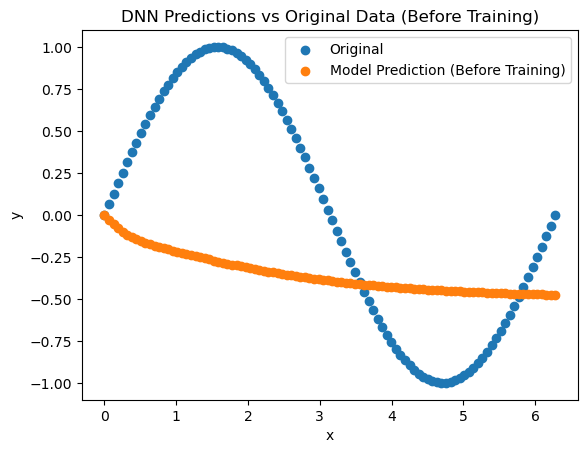

In [196]:
# Plotting the results before training
# We can use plt.scatter to construct a scatter plot of x,y coordinates with a label
plt.scatter(x, y, label='Original')
plt.scatter(x, y_pred_before, label='Model Prediction (Before Training)') # Use y_pred_before as the model prediction

# Define some important labels that make the graph mean something
plt.title("DNN Predictions vs Original Data (Before Training)")
plt.xlabel("x")
plt.ylabel("y")

# Lets add a Legend and plot our graph
plt.legend()
plt.show()

***
## Part 1 - Now lets train our model

In [197]:
# Our model is trained by calling model.train( ... )

# The parameters we need to pass to this model are:
#    input_data, input_labels, how-long-to-train, learning-rate
#    x_train,    y_train,      epochs,            learning-rate

history = part1_model.train(x_train,y_train,5000,0.001)

epoch: 0, loss: 0.2599031278743485


***
## Part 1 - Let's plot the loss function through this training 

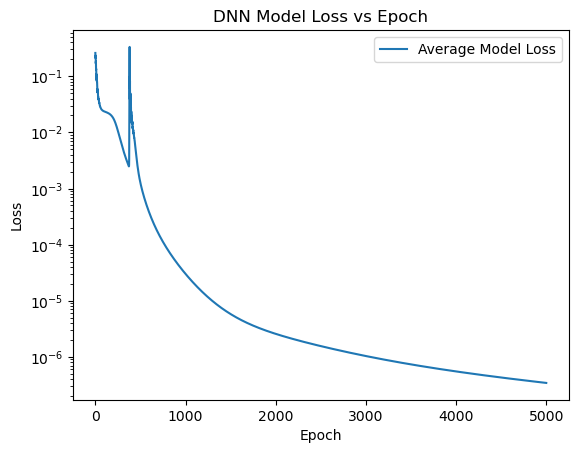

In [198]:
# Now use matplotlib to plot the loss function vs epoch
# This can be achieved simply by using the plt.plot( ... ) method which takes a list of values to plot
# We can do this because the number of epochs is just an interating list so need to construct this for plotting a scatter plot

plt.plot(history, label='Average Model Loss')

# Add labels, legend, make log and plot
plt.title("DNN Model Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.yscale('log')
plt.show()

***
## Part 1 - Make prediction after model has been trained

In [199]:
# Predictions after training
# As before lets make a prediction but with our trained model
y_pred_after = part1_model.forward(x_train)

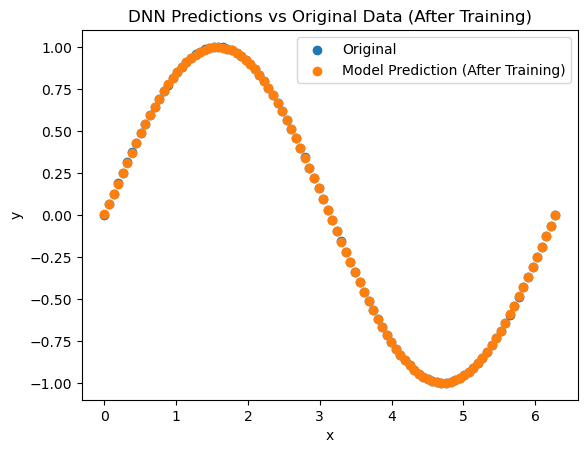

In [200]:
# Plotting the results before training
plt.scatter(x, y, label='Original')
plt.scatter( x,y_pred_after, label='Model Prediction (After Training)') # Use y_pred_after as the model prediction
plt.title("DNN Predictions vs Original Data (After Training)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

***
***

***
***
# Part 2 - PyTorch DNN
This part of the notebook walks through building a DNN using the PyTorch API
***
***

***
## Part 2 - Imports and Globals

Here we want to make sure we have the relevant parts of the PyTorch framework loaded for us to use later on

In [201]:
import torch
import torch.nn as nn
import torch.optim as optim

In [202]:
#PyTorch Supports 'accelerator' devices such as CUDA on Linux and MPS on MacOS

# If you're lucky enough to have access to this, lets take advantage of it

# Select the best available device
if torch.cuda.is_available():
    device = torch.device("cuda")  # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = torch.device("mps")   # Apple Metal (MPS)
else:
    device = torch.device("cpu")   # CPU fallback

# Report the device that we're using
print(f"Using device: {device}")

Using device: mps


In [203]:
# This is a connection of globals needed to make everything re-producible

torch.manual_seed(_FIXED_SEED)  # PyTorch CPU

# Ensure reproducibility on Metal (MPS)
if torch.backends.mps.is_available():
    torch.mps.manual_seed(_FIXED_SEED)  # Fix seed for MPS backend

if torch.cuda.is_available():
    torch.cuda.manual_seed(_FIXED_SEED)  # PyTorch GPU (if used)
    torch.cuda.manual_seed_all(_FIXED_SEED)  # If using multi-GPU

    # Ensure deterministic behavior in CUDA operations (if available)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False  # Disable auto-tuner for determinism

***
## Part 2 - Convert the NumPy dataset to use with PyTorch

PyTorch uses objects called "Tensors" for passing around data.

PyTorch also expects these Tensor objects to be sent to a device if the data needs to be there.

e.g. before a model can run on a GPU we need to send the model and the data to the GPU

In [204]:
# Convert to PyTorch tensors
# We're converting the shape here because PyTorch will helpfully reduce the extra 1-dim from our dataset but we want it
#
# Why do you think we're using torch floats here?
#
X_tensor = torch.tensor(x_train, dtype=torch.float32).reshape(-1,1).to(device)
Y_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1,1).to(device)

***
## Part 2 - Construct a simple DNN in PyTorch

In [205]:
# Define a simple DNN model
class SimpleDNN(nn.Module):

    def __init__(self, hidden_size):
        # This is our model's constructor

        # This model is inheriting from existing classes in PyTorch
        # This is needed for inheritance to work properly
        super(SimpleDNN, self).__init__()

        # The object self.model will contain the important part of the model in PyTorch

        ## The nn.Sequential model allows us to simply pass a list of layers that we want PyTorch to construct
        ## Every single layer in a DNN(MLP) in a nn.Linear class in PyTorch which needs to know it's input and output dim
        ## Between each layer (but not at the output!) we need to add an activation
        ## As above we're going to use the Tanh function which is accessed via nn.Tanh()

        ## We want a 3 layer DNN which has an input dim of 1, ("hidden_size", "hidden_size") middle layer
        ## and an output dim of 1 
        self.model = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size,hidden_size),
            nn.Tanh(),## FINISH_ME ##,  # Add the activation after the second layer
            nn.Linear(hidden_size, 1)
            ## NB: No activation at the output layer(!)
        )

    ## We also want a forward pass method to know how to evaluate our model
    def forward(self, x):
        # This simply calls the internal self.model object
        return self.model(x)

    ## We don't need to explicitly define a backwards method, we get that free from PyTorch :)

In [206]:
# Construct our model and pass it to any accelerator we have access to
part2_model = SimpleDNN(hidden_size).to(device)

***
##  Part 2 - Make predictions using our pre-trained model

In [207]:
# Evaluate model

## Make sure the model is in evaluate mode
part2_model.eval()

## Take a prediction using
prediction_Tensor = part2_model(X_tensor)

print(f"Prediction type: {type(prediction_Tensor)}")
print(f"Input Data Shape: {X_tensor.shape}")
print(f"Output Data Shape: {prediction_Tensor.shape}")

## Make sure that our prediction has been copied back to the CPU
## Then convert it to numpy so we can use it elsewhere
predictions = prediction_Tensor.cpu().detach().numpy()

Prediction type: <class 'torch.Tensor'>
Input Data Shape: torch.Size([100, 1])
Output Data Shape: torch.Size([100, 1])


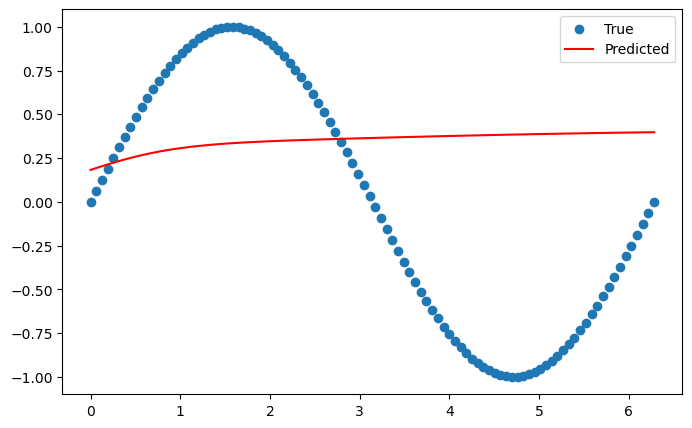

In [208]:
# Plot results comparing true data to pre-training predictions
plt.figure(figsize=(8, 5))

# Plot the true data as a scatter plot
plt.scatter(x_train, y_train, label='True')

# Overlay the model's predictions as a line
# The untrained model should produce random outputs
plt.plot( x_train,predictions, label='Predicted', color='red') # Use PyTorch predictions as the model output

# Display the graph
plt.legend()
plt.show()

***
## Part 2 - Construct some other objects needed to work with the PyTorch API

In [209]:
# Initialize model, loss function, and optimizer

# Define the loss function (criterion)
# MSELoss computes the mean squared error: mean((predictions - targets)^2)
# This is consistent with Part 1's manual loss calculation
criterion = nn.MSELoss()

# Define the optimizer for updating model parameters
# SGD (Stochastic Gradient Descent) with learning rate 0.001
# The optimizer will update part2_model.parameters() using computed gradients
optimizer = optim.SGD(part2_model.parameters(), lr=0.001)

# Initialize a list to store loss values during training
# This allows us to visualize how the loss changes over epochs
losses = []

***
## Part 2 - Train our PyTorch model

In [210]:
# Training loop
# We iterate through 'epochs' which define how many times we loop through our entire dataset
epochs = 100000

# Iterate through all of the epochs
for epoch in range(epochs):

    # Put the model into 'training' mode
    # This enables gradient tracking and any training-specific behaviors (like dropout)
    part2_model.train()

    # Reset the optimizer to clear accumulated gradients from previous iterations
    optimizer.zero_grad()

    # Forward pass: evaluate our model on the input data
    # This will compute outputs and store intermediate activations
    outputs = part2_model(X_tensor)

    # Calculate our loss by comparing outputs to ground truth labels
    # The criterion (MSELoss) computes: mean((outputs - Y_tensor)^2
    loss = criterion(outputs,Y_tensor)## FINISH_ME ##  # Use criterion to compute loss between outputs and Y_tensor

    # Backward pass: compute gradients of the loss with respect to all parameters
    # PyTorch automatically handles all the backpropagation for us
    loss.backward()

    # Update all parameters in the model using the computed gradients
    # The optimizer applies the update rule: param = param - learning_rate * grad
    optimizer.step()

    # Store the loss value for later visualization
    losses.append(loss.item())


    # Report progress at regular intervals
    if epoch % 5000 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

Epoch [0/100000], Loss: 0.6565
Epoch [5000/100000], Loss: 0.1486
Epoch [10000/100000], Loss: 0.1087
Epoch [15000/100000], Loss: 0.0812
Epoch [20000/100000], Loss: 0.0686
Epoch [25000/100000], Loss: 0.0622
Epoch [30000/100000], Loss: 0.0573
Epoch [35000/100000], Loss: 0.0526
Epoch [40000/100000], Loss: 0.0480
Epoch [45000/100000], Loss: 0.0436
Epoch [50000/100000], Loss: 0.0393
Epoch [55000/100000], Loss: 0.0349
Epoch [60000/100000], Loss: 0.0307
Epoch [65000/100000], Loss: 0.0265
Epoch [70000/100000], Loss: 0.0225
Epoch [75000/100000], Loss: 0.0187
Epoch [80000/100000], Loss: 0.0154
Epoch [85000/100000], Loss: 0.0124
Epoch [90000/100000], Loss: 0.0099
Epoch [95000/100000], Loss: 0.0078


***
## Part 2 - Evaluate our model and plot the results

In [211]:
# Evaluate model
# As with above put the model in evaluate mode
part2_model.eval()

## As with above we want to evaluate our model using our dataset
## Then we need to pass it back to the CPU then NumPY
predictions = part2_model(X_tensor).cpu().detach().numpy()

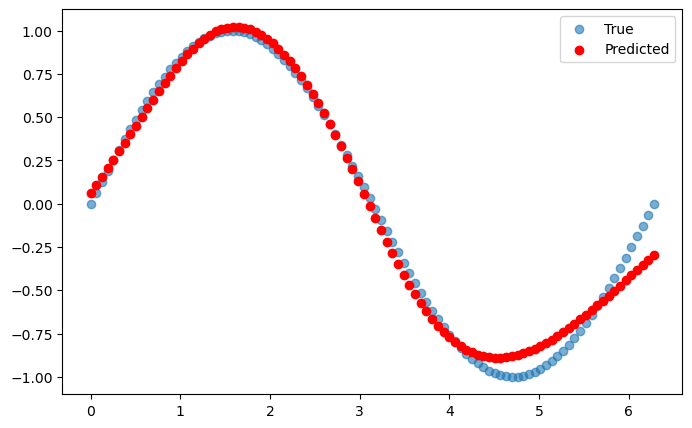

In [212]:
# Plot results after training
plt.figure(figsize=(8, 5))

# Plot the true data and the model's predictions
# The model should now fit the sinusoidal pattern much better
plt.scatter(x_train, y_train, label='True', alpha=0.6)
plt.scatter(x_train,predictions, label='Predicted', color='red') # Use predictions as the model output

# Display the graph
plt.legend()
plt.show()

***
## Part 2 - Lets examine our loss

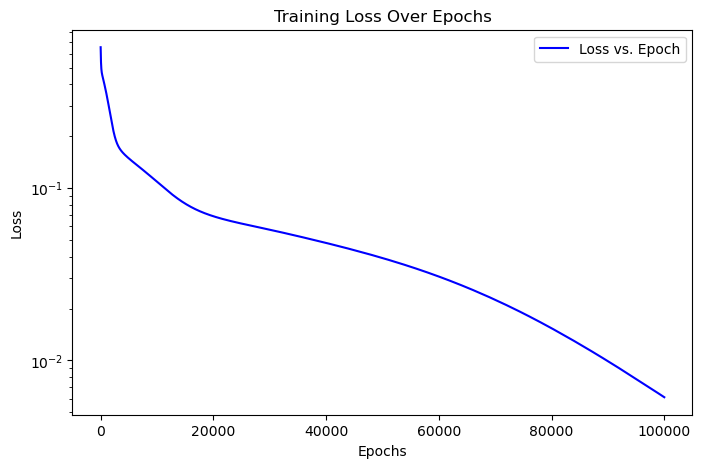

In [213]:
# Plot loss history over training
plt.figure(figsize=(8, 5))

# Plot the loss values collected during each epoch
# The log scale helps visualize large changes across epochs
plt.plot(losses, label="Loss vs. Epoch", color="blue")

# Add labels and formatting
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.yscale('log')
plt.show()

***
***
# Part 3 - Building a Classifier
This part of the notebook walks through building and training a Classifier using the PyTorch API
***
***

***
## Part 3 - Load the modules needed to Build, Train and examine a Classifier

In [214]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

***
## Part 3 - Set some Globals to make everything reproducible

In [215]:
# Set manual seed for reproducibility
# This is a connection of globals needed to make everything re-producible

torch.manual_seed(_FIXED_SEED)  # PyTorch CPU

# Ensure reproducibility on Metal (MPS)
if torch.backends.mps.is_available():
    torch.mps.manual_seed(_FIXED_SEED)  # Fix seed for MPS backend

if torch.cuda.is_available():
    torch.cuda.manual_seed(_FIXED_SEED)  # PyTorch GPU (if used)
    torch.cuda.manual_seed_all(_FIXED_SEED)  # If using multi-GPU

    # Ensure deterministic behavior in CUDA operations (if available)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False  # Disable auto-tuner for determinism

np.random.seed(_FIXED_SEED)

In [216]:
# As in Part 2 if you have a supported 'accelerator' it's nice to use it

# Select the best available device
if torch.cuda.is_available():
    device = torch.device("cuda")  # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = torch.device("mps")   # Apple Metal (MPS)
else:
    device = torch.device("cpu")   # CPU fallback

print(f"Using device: {device}")

Using device: mps


In [217]:
epochs = 50

***
## Part 3 - Loading the Dataset so that we can use it to build a Classifier

In [218]:
# Load MNIST dataset and split into training and verification sets
def load_mnist_as_numpy(train=True):
    dataset = torchvision.datasets.MNIST(root="./data", train=train, download=True)

    # Convert images & labels to NumPy arrays
    images = np.array([np.array(img, dtype=np.float32) for img, _ in dataset])
    labels = np.array([label for _, label in dataset], dtype=np.int64)

    # Normalize manually: Convert [0, 255] → [-1, 1]
    images = (images / 127.5) - 1.0

    # Reshape to (N, 28, 28) for experimenting
    images = images.reshape(-1, 28, 28)

    # Convert labels to one-hot encoding (equivalent to looking at `categorical`)
    labels = np.eye(10)[labels]

    return images, labels  # For test set (no split)

### First Load the dataset

This returns a numpy object which you can use to examine the data

In [219]:
# Load datasets
X_train, Y_train = load_mnist_as_numpy(train=True)
X_test, Y_test = load_mnist_as_numpy(train=False)

***
## Part 3 - Examine the dataset

What is the size and shape of the data we're working with?

In [220]:
print(f"X shape: {X_train.shape}")
print(f"Y shape: {Y_train.shape}")

X shape: (60000, 28, 28)
Y shape: (60000, 10)


/var/folders/5b/vhtv0l455n5_xnlwgthqdxgm0000gp/T/ipykernel_22232/2467969027.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


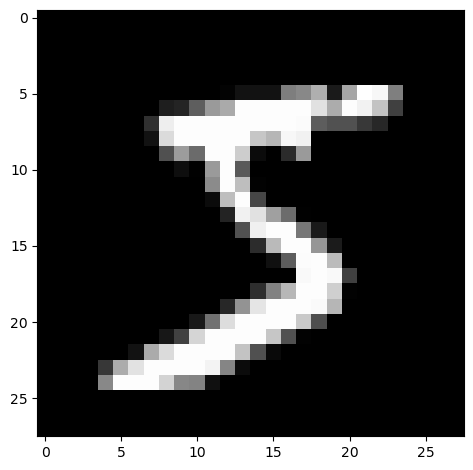

In [221]:
fig = plt.figure()
fig.set_tight_layout(True)
## Plot the first image in the training set
plt.imshow( X_train[0], cmap='gray') # Use X_train[0] as the image to plot
fig.show()

### Now we need to convert this to Tensors for PyTorch

In [222]:
# Convert NumPy arrays to PyTorch tensors
## Use the torch.from_numpy to construct Tensors from Numpy Arrarys
X_train, Y_train = torch.from_numpy(X_train).to(device), torch.from_numpy(Y_train).float().to(device)
X_test, Y_test = torch.from_numpy(X_test).to(device), torch.from_numpy(Y_test).float().to(device)

# Create DataLoaders
## Our dataset is constructed from the Data and Labels
## We are chosing to use batches of 64 images in size with this model
train_dataset = torch.utils.data.DataLoader(list(zip(X_train, Y_train)), batch_size=64, shuffle=True)
test_dataset = torch.utils.data.DataLoader(list(zip(X_test, Y_test)), batch_size=64, shuffle=False)

***
## Part 3 - Build a Classifier DNN

In [223]:
# Define the model using PyTorch's `Sequential`
## We just want to use the nn.Sequential directly here no wrapper classes
part3_model = nn.Sequential(
    nn.Flatten(),                # Used to make sure the data from each batch is a flat numerical array
    nn.Linear(28 * 28, 128),     # Fully connected layer input -> 128 dim
    nn.ReLU(),                   # Activation   (I like ReLU)
    nn.Linear(128, 64) ,             # Hidden layer (128 -> 64 dim)
    nn.ReLU(),              # Activation   (I like ReLU)
    nn.Linear(64, 10),           # Output layer (64-dim -> logits output)
    # nn.Sigmoid()               # NB: We don't need a final activation because nn.CrossEntropyLoss applies LogSoftmax internally
)
# Why do you think we're using a ReLU activation on this model but not for the earlier one?

# Move model to device
part3_model = part3_model.to(device)

***
## Part 3 - Make Some predictions before Training

In [224]:
# In order to pass a single entry to our model for evaluation/prediction it needs to be in a (1, X) rather than just passing 1 element
# This is the same as 'passing a batch of 1' to the model
prediction = part3_model(X_train[0].unsqueeze(0))
print(f"Prediction Type: {type(prediction)}")
truth = Y_train[0].cpu().detach().numpy()
prediction = prediction.cpu().detach().numpy()
print(f"Prediction Value: {prediction}")

Prediction Type: <class 'torch.Tensor'>
Prediction Value: [[ 0.02994201  0.12114245 -0.12577371  0.11067826 -0.17563099  0.14226396
  -0.20957586  0.07447904  0.22106619  0.08471593]]


Text(0.5, 0, 'Number')

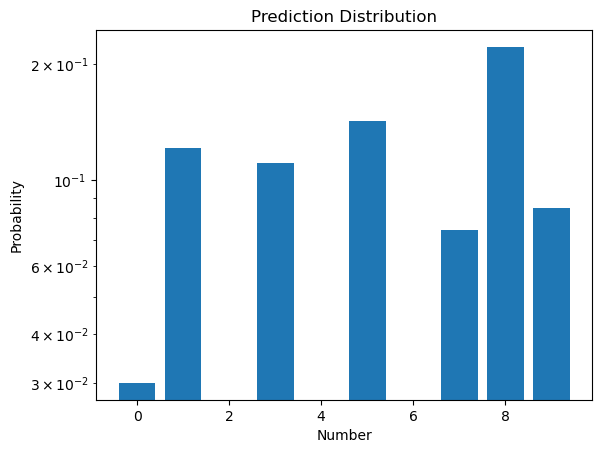

In [225]:
# plotting the predictions
fig = plt.figure()
x=[_ for _ in range(len(prediction[0]))]
plt.bar(x, prediction[0])
plt.title('Prediction Distribution')
plt.yscale('log')
plt.ylabel('Probability')
plt.xlabel('Number')

In [226]:
print(f"Truth: {np.argmax( truth )}") # Use truth as the ground truth label
print(f"Prediction: {np.argmax( prediction )}") # Use prediction as the model output

Truth: 5
Prediction: 8


***
## Part 3 - Define some objects needed for training

In [227]:
# Training parameters
epochs = 50

# We want to track losses and the accuracy of our model during training
train_losses = []
train_accuracies = []

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # No need for one-hot encoding in loss function
optimizer = optim.SGD(part3_model.parameters(), lr=0.001, momentum=0.9)

***
## Part 3 - Now train our classifier

In [228]:
# Training loop
## Loop through n-epochs
for epoch in range(epochs):

    ## Reset some counters we're going to use
    total_loss, correct, total = 0, 0, 0

    ## Looping through all batches in our dataset here
    for images, labels in train_dataset:

        ## Put our model into training mode
        part3_model.train()

        ## Make sure that the data we're interested in evaluating is on the correct device
        images, labels = images.to(device), labels.to(device)

        ## Reset our Optimizer
        optimizer.zero_grad()

        ## Evaluate this batch of images with our model
        outputs = part3_model(images)

        ## Our model outputs an array of values, lets compare this to truth to get our loss
        loss = criterion(outputs, labels)

        ## Evaluate the back-propagation of our model
        loss.backward()

        ## Optimize our model based on evaluating this batch
        optimizer.step()

        
        ## We can put the model back into non-training mode here 
        part3_model.eval()
        with torch.no_grad():

            ## Add the loss from batch to the total loss from this epoch
            ## .item() here returns the raw values no need to move off GPU
            total_loss += loss.item()

            ## Calculate how many times the model evaluated correctly
            ## .item() here returns the raw values no need to move off GPU
            correct += (outputs.argmax(dim=1) == labels.argmax(dim=1)).sum().item()

            ## What was the size of this batch? i.e. how many datapoints processed?
            total += len(labels)

    # Back into non-training mode
    part3_model.eval()
    with torch.no_grad():

        ## Calculate the average loss of the dataset over the whole epoch
        avg_train_loss = total_loss/total  # total_loss divided by number of batches
        ## Store the average loss per epoch
        train_losses.append(avg_train_loss)
        ## Calculate the average accuracy per epoch
        train_accuracy = correct/total # correct divided by total
        ## Store the average accuracy per epoch
        train_accuracies.append(train_accuracy)

    ## Report the average loss and Accuracy per epoch during fitting
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}")


Epoch [1/50], Train Loss: 0.0160, Train Acc: 0.7272
Epoch [2/50], Train Loss: 0.0059, Train Acc: 0.8920
Epoch [3/50], Train Loss: 0.0050, Train Acc: 0.9060
Epoch [4/50], Train Loss: 0.0046, Train Acc: 0.9151
Epoch [5/50], Train Loss: 0.0042, Train Acc: 0.9217
Epoch [6/50], Train Loss: 0.0039, Train Acc: 0.9279
Epoch [7/50], Train Loss: 0.0036, Train Acc: 0.9338
Epoch [8/50], Train Loss: 0.0033, Train Acc: 0.9397
Epoch [9/50], Train Loss: 0.0030, Train Acc: 0.9442
Epoch [10/50], Train Loss: 0.0028, Train Acc: 0.9480
Epoch [11/50], Train Loss: 0.0026, Train Acc: 0.9520
Epoch [12/50], Train Loss: 0.0024, Train Acc: 0.9550
Epoch [13/50], Train Loss: 0.0022, Train Acc: 0.9583
Epoch [14/50], Train Loss: 0.0021, Train Acc: 0.9607
Epoch [15/50], Train Loss: 0.0020, Train Acc: 0.9633
Epoch [16/50], Train Loss: 0.0019, Train Acc: 0.9655
Epoch [17/50], Train Loss: 0.0018, Train Acc: 0.9675
Epoch [18/50], Train Loss: 0.0017, Train Acc: 0.9694
Epoch [19/50], Train Loss: 0.0016, Train Acc: 0.9706
Ep

***
## Part 3 - Lets examine our training history

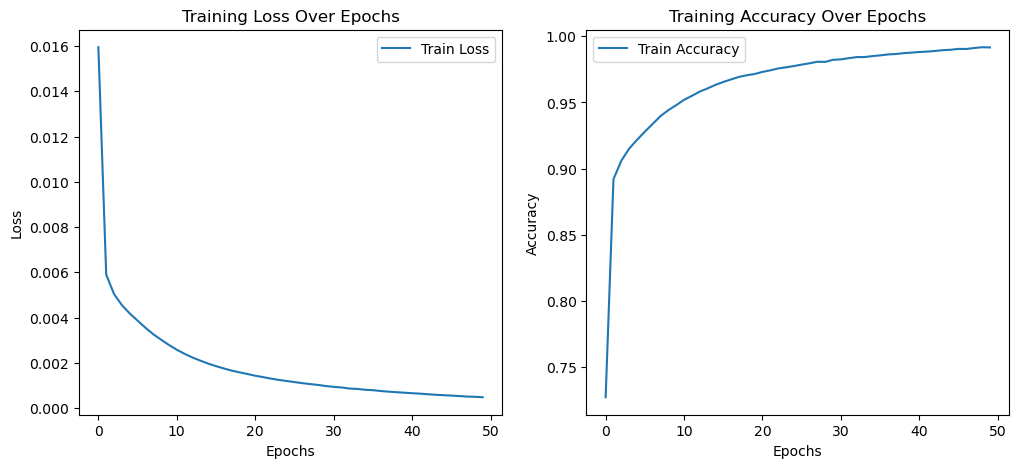

In [229]:
# Plot loss and accuracy
## Make a canvas
plt.figure(figsize=(12, 5))

# Plot Training Loss
## Make a subplot
plt.subplot(1, 2, 1)
plt.plot(train_losses,label="Train Loss") # Use train_losses as the loss values to plot
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot( train_accuracies, label="Train Accuracy") # Use train_accuracies as the accuracy values to plot
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()

plt.show()

***
## Part 3 - Estimate model accuracy

Now use the test dataset to make an estimate as to how accurate the model is

In [230]:
correct = 0
test_prediction = part3_model(X_test.to(device))
print(test_prediction.shape)
print(Y_test.shape)

torch.Size([10000, 10])
torch.Size([10000, 10])


In [231]:
correct += (test_prediction.argmax(dim=1) == Y_test.argmax(dim=1)).sum()
print(f"Test Accuracy = {correct/len(test_prediction)*100:.4}%")

Test Accuracy = 97.71%


***
***
# Part 4 - Projecting a DNN beyond the training window
***
***

***
## Part 4 - Now generate a new dataset

This dataset needs to be 5x as long with 5x as much data and containing 5 waveforms compared to Part1 and Part2

In [232]:
# Generate sinusoidal data
timesteps = 50 # number of timesteps in the data, 50 for more cycles
x = np.linspace( 0,10*np.pi ) # Generate 'timesteps' linearly spaced samples between 0 and 10*np.pi
y = np.sin(x) # Generate the sin of x to get the sinusoidal waveform
# Reshape x and y for training (our model is explicitly designed to take inputs of (1,) in shape and make an output the same)
x_beyond = x.reshape(-1, 1)
y_beyond = y.reshape(-1, 1)

***
## Part 4 - Now evaluate our NumPY DNN and plot what we see

In [233]:
# Evaluate model
predictions = part1_model.forward(x_beyond)

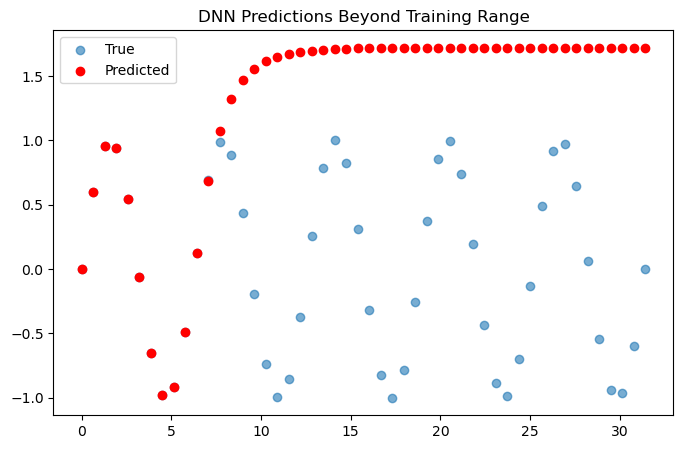

In [234]:
# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x_beyond, y_beyond, label='True', alpha=0.6)
plt.scatter(x_beyond, predictions, label='Predicted', color='red') # Use predictions as the model output
plt.title("DNN Predictions Beyond Training Range")
plt.legend()
plt.show()

In [235]:
X_tensor = torch.tensor(x_beyond, dtype=torch.float32).reshape(-1,1).to(device)

***
## Part 4 - Now evaluate our PyTorch DNN and plot the result

In [236]:
# Evaluate model
part2_model.eval()
predictions = part2_model(X_tensor).cpu().detach().numpy()

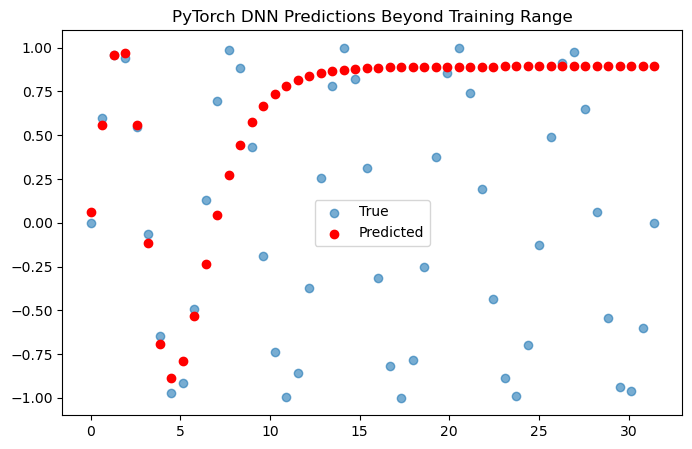

In [237]:
# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x_beyond, y_beyond, label='True', alpha=0.6)
plt.scatter( x_beyond,predictions, label='Predicted', color='red') # Use PyTorch predictions as the model output
plt.title("PyTorch DNN Predictions Beyond Training Range")
plt.legend()
plt.show()

***
## Part 4 - Do the DNN/MLP models extend as you expected it to?

What do you see and can you think why this is the case?

### Answer

Since we are using a DNN, we cannot expect it to remember outside out range, therefore this is the expected behaviour. Observe that the pytorch predictions are in range, while the numpy are exceeding.